In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/foodprices-regionx-philippines/Region X Data - Sheet1.csv


# Unveiling the Fluctuating Food Prices: A Closer Look at Region 10, Philippines

## Introduction

The dataset "Philippines - Food Prices" is sourced from the World Food Programme (WFP) Price Database and offers comprehensive food price information for various items like maize, rice, beans, fish, and sugar in 98 countries and over 3000 markets. Updated weekly, the data covers a reference period from January 15, 2000, to November 15, 2023. While some data goes back to 1992, many countries started reporting from 2003 or later, ensuring a substantial and reliable dataset.

**Location and Organization Details:** The dataset originates from the World Food Programme (WFP), a renowned international organization committed to alleviating hunger and malnutrition worldwide. Specifically, this dataset focuses on food prices in the Philippines. It serves as an essential resource for policymakers, researchers, and analysts to understand food market trends and make informed decisions to address food security challenges in the region.

**Credibility and Integrity:** The World Food Programme (WFP) is a trusted and reputable organization with extensive experience in humanitarian efforts. Their Price Database is a reliable source of information, collecting data from multiple countries and markets. The regular updates and the extensive coverage of food items demonstrate the data's credibility. Additionally, the dataset's long reference period and ongoing updates contribute to its integrity, making it a valuable resource for conducting analyses and making informed decisions in the food and agricultural sectors.

### Objectives: (ASK)
1. What city/provinces in the region 10 has the most record available?
2. What are the top 5 (five) commodities reported?
3. Yearly averaged price movement of the top 5
4. What city/provinces has with the most expensive prices for the top 5 commodities mention?
5. In relation to the main products or commodities produced by Region 10 how does the prices varies from the top 5 commodities mentioned?

## Data Preprocessing

Importing the csv file.

In [2]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = 20

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data_csv = "/kaggle/input/foodprices-regionx-philippines/Region X Data - Sheet1.csv"
data = pd.read_csv(data_csv, engine='python')
data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2008,Region X,Lanao del Norte,Tubod,8.219167,124.248889,cereals and tubers,Potatoes (Irish),KG,actual,Retail,PHP,52.38,1.2994
1,1/15/2008,Region X,Lanao del Norte,Tubod,8.219167,124.248889,cereals and tubers,Rice (paddy),KG,actual,Farm Gate,PHP,11.92,0.2957
2,1/15/2008,Region X,Lanao del Norte,Tubod,8.219167,124.248889,cereals and tubers,Sweet potatoes,KG,actual,Retail,PHP,19.92,0.4942
3,1/15/2008,Region X,Lanao del Norte,Tubod,8.219167,124.248889,vegetables and fruits,Cabbage,KG,actual,Retail,PHP,28.91,0.7172
4,1/15/2008,Region X,Lanao del Norte,Tubod,8.219167,124.248889,vegetables and fruits,Carrots,KG,actual,Retail,PHP,34.00,0.8435


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       11149 non-null  object 
 1   admin1     11149 non-null  object 
 2   admin2     11149 non-null  object 
 3   market     11149 non-null  object 
 4   latitude   11149 non-null  float64
 5   longitude  11149 non-null  float64
 6   category   11149 non-null  object 
 7   commodity  11149 non-null  object 
 8   unit       11149 non-null  object 
 9   priceflag  11149 non-null  object 
 10  pricetype  11149 non-null  object 
 11  currency   11149 non-null  object 
 12  price      11149 non-null  float64
 13  usdprice   11149 non-null  float64
dtypes: float64(4), object(10)
memory usage: 1.2+ MB


**The detail provided describes a DataFrame with 11,149 rows and 14 columns. The columns are:**

- date: The date of the price measurement.
- admin1: The first-level administrative division of the location where the price was measured.
- admin2: The second-level administrative division of the location where the price was measured.
- market: The type of market where the price was measured.
- latitude: The latitude of the location where the price was measured.
- longitude: The longitude of the location where the price was measured.
- category: The category of the commodity whose price was measured.
- commodity: The name of the commodity whose price was measured.
- unit: The unit of measurement for the price.
- priceflag: A flag indicating whether the price is a retail or wholesale price.
- pricetype: The type of price (e.g., USD, EUR, etc.).
- price: The price of the commodity.
- usdprice: The price of the commodity in USD.

In [5]:
data.describe(include="object")

,date,admin1,admin2,market,category,commodity,unit,priceflag,pricetype,currency
count,11149,11149,11149,11149,11149,11149,11149,11149,11149,11149
unique,176,1,5,7,6,68,3,3,3,1
top,2/15/2023,Region X,Lanao del Norte,Misamis Oriental,vegetables and fruits,Cabbage,KG,actual,Retail,PHP
freq,304,11149,3494,2074,5439,431,10796,7829,10881,11149


### The Provinces in the data.

In [6]:
print(data.admin2.unique())

['Lanao del Norte' 'Bukidnon' 'Camiguin' 'Misamis Occidental'
 'Misamis Oriental']


### To filter specific values from the 'category' column and print the unique values in relation to 'commodity'

In [7]:
# Filter the data based on the 'category' column
filtered_data = data[data['category'] == 'vegetables and fruits']

# Get unique values in relation to 'commodity'
unique_commodities = filtered_data['commodity'].unique()

# Print the unique values
print("Unique values in relation to 'commodity' for category 'vegetables and fruits':")
for commodity in unique_commodities:
    print(commodity)

Unique values in relation to 'commodity' for category 'vegetables and fruits':
Cabbage
Carrots
Onions (red)
Onions (white)
Tomatoes
Garlic
Bananas (lakatan)
Bananas (latundan)
Bananas (saba)
Beans (green, fresh)
Beans (string)
Bitter melon
Bottle gourd
Cabbage (chinese)
Calamansi
Choko
Coconut
Eggplants
Ginger
Mandarins
Mangoes (carabao)
Papaya
Pineapples
Squashes
Sweet Potato leaves
Water spinach
Garlic (large)
Garlic (small)


### Data Cleaning 
- In data cleaning we filter the data column price with the value of zero. The number of rows had decreased from 11149 to 8145.
- Locate missing values (NaN) and null values
- Locate duplicate rows in the entire DataFrame
- Calculate the Z-Score for each value in the 'price' column
- Visualize the outliers using a scatter plot
- Visualize the noisy data using a line chart
- Outlier Detection and Noise Reduction using Machine Learning

In [8]:
# Filter and delete rows with zero values in the 'price' column
data = data[data['price'] != 0]

# Save the updated DataFrame into a new CSV file named 'updated_data.csv'
data.to_csv('region10.csv', index=False)

# Print a message to confirm the save
print("Updated data has been saved to 'region.csv'")

Updated data has been saved to 'region.csv'


In [9]:
data_csv = "/kaggle/working/region10.csv"
data = pd.read_csv(data_csv, engine='python')
data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2008,Region X,Lanao del Norte,Tubod,8.219167,124.248889,cereals and tubers,Potatoes (Irish),KG,actual,Retail,PHP,52.38,1.2994
1,1/15/2008,Region X,Lanao del Norte,Tubod,8.219167,124.248889,cereals and tubers,Rice (paddy),KG,actual,Farm Gate,PHP,11.92,0.2957
2,1/15/2008,Region X,Lanao del Norte,Tubod,8.219167,124.248889,cereals and tubers,Sweet potatoes,KG,actual,Retail,PHP,19.92,0.4942
3,1/15/2008,Region X,Lanao del Norte,Tubod,8.219167,124.248889,vegetables and fruits,Cabbage,KG,actual,Retail,PHP,28.91,0.7172
4,1/15/2008,Region X,Lanao del Norte,Tubod,8.219167,124.248889,vegetables and fruits,Carrots,KG,actual,Retail,PHP,34.00,0.8435


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8145 entries, 0 to 8144
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       8145 non-null   object 
 1   admin1     8145 non-null   object 
 2   admin2     8145 non-null   object 
 3   market     8145 non-null   object 
 4   latitude   8145 non-null   float64
 5   longitude  8145 non-null   float64
 6   category   8145 non-null   object 
 7   commodity  8145 non-null   object 
 8   unit       8145 non-null   object 
 9   priceflag  8145 non-null   object 
 10  pricetype  8145 non-null   object 
 11  currency   8145 non-null   object 
 12  price      8145 non-null   float64
 13  usdprice   8145 non-null   float64
dtypes: float64(4), object(10)
memory usage: 891.0+ KB


In [11]:
#locate missing values (NaN) and null values
# Locate missing values (NaN) in the entire DataFrame
missing_values = data.isnull()

# Count the number of missing values in each column
missing_values_count = data.isnull().sum()

# Print the locations of missing values
print("Locations of missing values (NaN):")
print(missing_values)

# Print the count of missing values in each column
print("\nCount of missing values in each column:")
print(missing_values_count)

Locations of missing values (NaN):
       date  admin1  admin2  market  latitude  longitude  category  commodity  \
0     False   False   False   False     False      False     False      False   
1     False   False   False   False     False      False     False      False   
2     False   False   False   False     False      False     False      False   
3     False   False   False   False     False      False     False      False   
4     False   False   False   False     False      False     False      False   
...     ...     ...     ...     ...       ...        ...       ...        ...   
8140  False   False   False   False     False      False     False      False   
8141  False   False   False   False     False      False     False      False   
8142  False   False   False   False     False      False     False      False   
8143  False   False   False   False     False      False     False      False   
8144  False   False   False   False     False      False     False      Fa

In [12]:
# Locate duplicate rows in the entire DataFrame
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
duplicate_rows_count = data.duplicated().sum()

# Print the locations of duplicate rows
print("Locations of duplicate rows:")
print(duplicate_rows)

# Print the count of duplicate rows
print("\nCount of duplicate rows:", duplicate_rows_count)

Locations of duplicate rows:
0       False
1       False
2       False
3       False
4       False
        ...  
8140    False
8141    False
8142    False
8143    False
8144    False
Length: 8145, dtype: bool

Count of duplicate rows: 0


In [13]:
# Calculate the Z-Score for each value in the 'price' column
z_scores = np.abs((data['price'] - data['price'].mean()) / data['price'].std())

# Define a threshold for outlier detection (e.g., Z-Score > 3, adjust as needed)
threshold = 3

# Create a boolean mask to identify outliers
outliers_mask = z_scores > threshold

# Filter the DataFrame to show only rows with outliers
outliers_data = data[outliers_mask]

# Print the rows with outliers
print("Outliers in the 'price' column:")
print(outliers_data)

Outliers in the 'price' column:
           date    admin1            admin2            market  latitude  \
774   2/15/2015  Region X   Lanao del Norte             Tubod  8.219167   
787   3/15/2015  Region X   Lanao del Norte             Tubod  8.219167   
800   4/15/2015  Region X   Lanao del Norte             Tubod  8.219167   
813   5/15/2015  Region X   Lanao del Norte             Tubod  8.219167   
826   6/15/2015  Region X   Lanao del Norte             Tubod  8.219167   
...         ...       ...               ...               ...       ...   
7711  4/15/2023  Region X          Camiguin          Camiguin  9.252862   
7713  4/15/2023  Region X          Camiguin          Camiguin  9.252862   
7715  4/15/2023  Region X          Camiguin          Camiguin  9.252862   
7741  4/15/2023  Region X   Lanao del Norte   Lanao del Norte  8.040911   
7804  4/15/2023  Region X  Misamis Oriental  Misamis Oriental  8.477437   

       longitude               category       commodity unit pricef

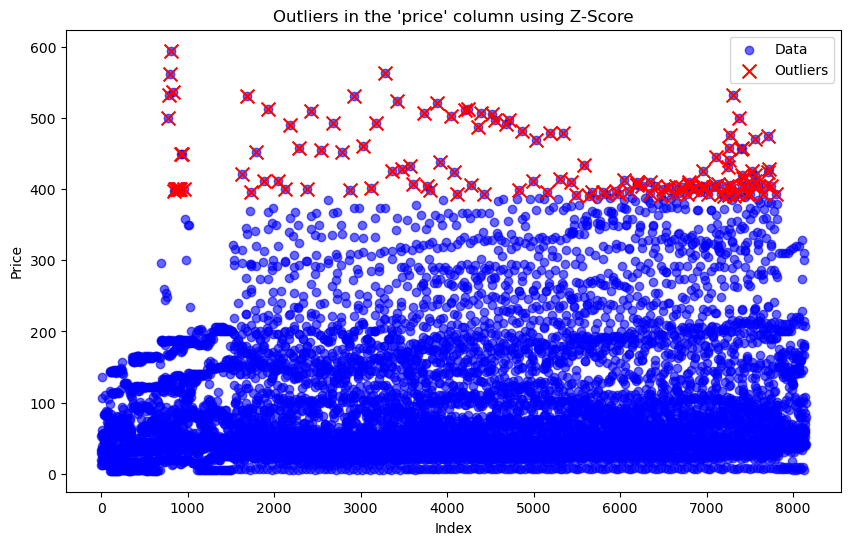

In [14]:
# Calculate the Z-Score for each value in the 'price' column
z_scores = np.abs((data['price'] - data['price'].mean()) / data['price'].std())

# Define a threshold for outlier detection (e.g., Z-Score > 3, adjust as needed)
threshold = 3

# Create a boolean mask to identify outliers
outliers_mask = z_scores > threshold

# Filter the DataFrame to show only rows with outliers
outliers_data = data[outliers_mask]

# Visualize the outliers using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['price'], label='Data', color='b', alpha=0.6)
plt.scatter(outliers_data.index, outliers_data['price'], label='Outliers', color='r', s=100, marker='x')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title("Outliers in the 'price' column using Z-Score")
plt.legend()
plt.show()

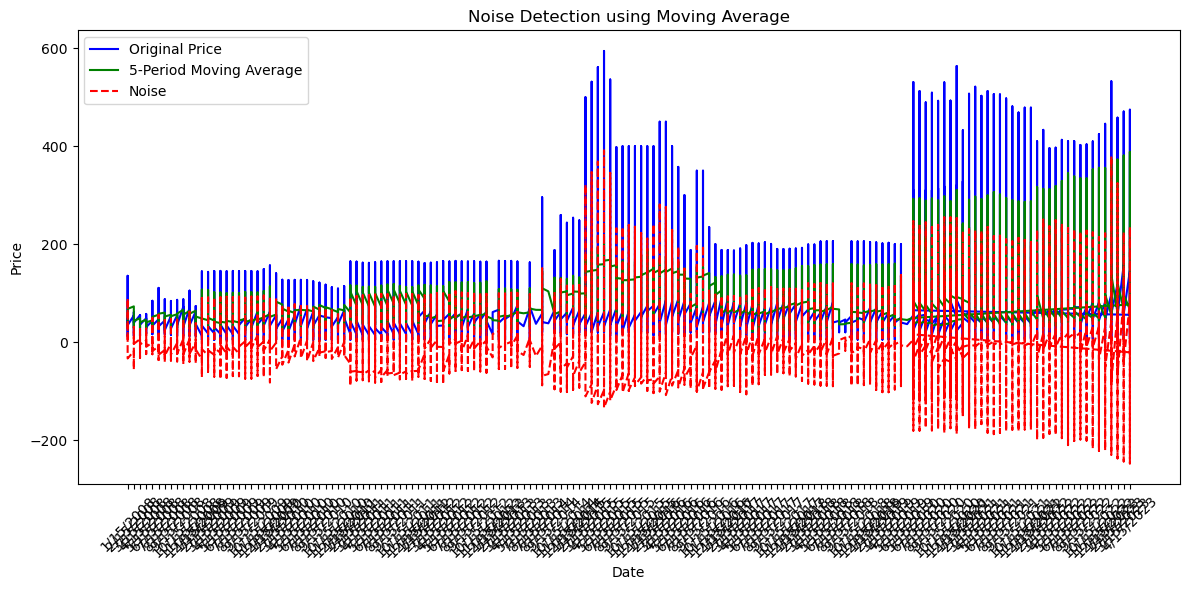

In [15]:
# Define the window size for the moving average (adjust as needed)
window_size = 5

# Calculate the rolling mean (moving average) of the 'price' column
rolling_mean = data['price'].rolling(window=window_size).mean()

# Calculate the difference between the original data and the rolling mean
noise = data['price'] - rolling_mean

# Visualize the noisy data using a line chart
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['price'], label='Original Price', color='b')
plt.plot(data['date'], rolling_mean, label=f'{window_size}-Period Moving Average', color='g')
plt.plot(data['date'], noise, label='Noise', color='r', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Noise Detection using Moving Average')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


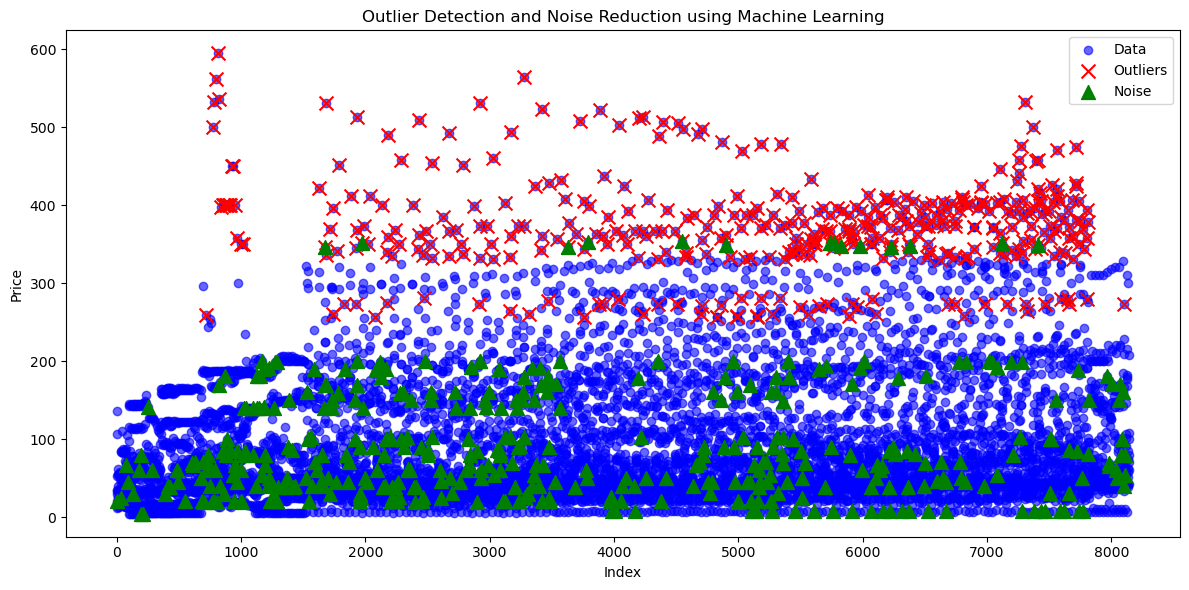

In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Assuming you have the data in a DataFrame named 'data'
# Replace 'data' with your actual DataFrame containing the data

# Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination (outlier proportion) as needed
data['is_outlier'] = iso_forest.fit_predict(data[['price']])

# Local Outlier Factor for noise reduction
lof = LocalOutlierFactor(contamination=0.05)  # Adjust contamination (outlier proportion) as needed
data['is_noise'] = lof.fit_predict(data[['price']])

# Visualize the data with outliers and noise
plt.figure(figsize=(12, 6))

# Plot the data points
plt.scatter(data.index, data['price'], color='b', alpha=0.6, label='Data')

# Highlight outliers and noise
plt.scatter(data[data['is_outlier'] == -1].index, data[data['is_outlier'] == -1]['price'], color='r', s=100, marker='x', label='Outliers')
plt.scatter(data[data['is_noise'] == -1].index, data[data['is_noise'] == -1]['price'], color='g', s=100, marker='^', label='Noise')

plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Outlier Detection and Noise Reduction using Machine Learning')
plt.legend()
plt.tight_layout()
plt.show()

**Economical food prices can indeed exhibit outliers and noise, but the extent of outliers and noise depends on various factors.** Here are some reasons why economical food prices might have outliers and noise:

**Market Fluctuations:** Food prices can be influenced by various factors such as supply and demand, weather conditions, transportation costs, and geopolitical events. These fluctuations can lead to occasional extreme price changes, resulting in outliers.

**Seasonal Variations:** Some food prices may vary significantly based on seasonal factors, crop cycles, or special occasions. Seasonal fluctuations can contribute to noise in the data.

**Economic Shocks:** Economic events like recessions, inflation, or currency fluctuations can impact food prices, leading to temporary spikes or declines, which may appear as outliers.

**Local vs. Global Prices:** Food prices can differ across regions due to factors like local production, distribution, and import/export policies. These disparities may lead to price outliers between different regions.

**Data Collection Errors:** Noise can be introduced due to data collection errors, data entry mistakes, or reporting inconsistencies.

**Volatility in Commodities:** Certain food commodities like grains, oilseeds, and livestock products can experience high price volatility in the global market, causing outliers.

**Supply Chain Disruptions:** Disruptions in the food supply chain, such as natural disasters or transportation issues, can lead to abrupt price changes.

While outliers and noise in economical food prices are expected to some extent, *it is essential to differentiate between genuine price fluctuations and data errors.* Analyzing and understanding the reasons behind outliers and noise can help in making informed decisions and predictions related to food prices. Additionally, techniques like outlier detection and noise reduction algorithms can be applied to clean the data and improve the accuracy of analysis and modeling.

## Data Visualizations and Analysis

#### Objective(ASK) 1. What city/provinces in the region 10 has the most record available?

/tmp/ipykernel_20/2574394305.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(admin2_counts))


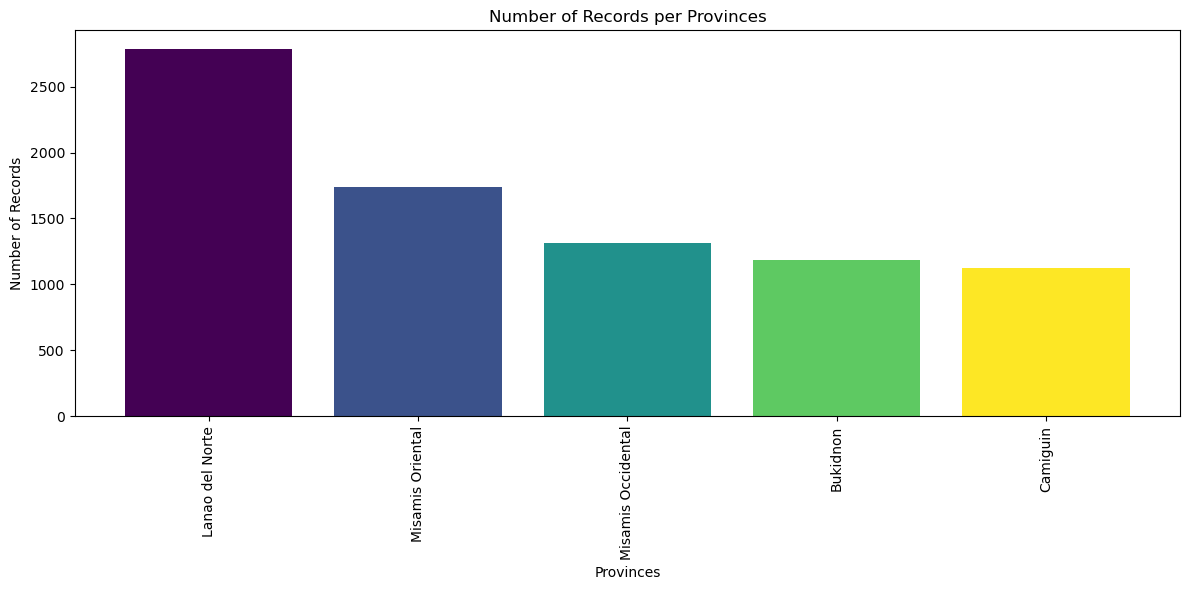

The Provinces with the most records available is 'Lanao del Norte' with 2788 records.


In [17]:
# Count the number of records for each unique value in the 'admin2' column
admin2_counts = data['admin2'].value_counts()

# Get the admin2 value with the most records available
most_records_admin2 = admin2_counts.index[0]

# Get the count of records for the admin2 with the most records available
most_records_count = admin2_counts.iloc[0]

# Define a color map for the bars (you can customize the colors as per your preference)
color_map = plt.cm.get_cmap('viridis', len(admin2_counts))

# Visualize the results using a bar graph
plt.figure(figsize=(12,6 ))
plt.bar(admin2_counts.index, admin2_counts.values, color=color_map(range(len(admin2_counts))))
plt.xlabel('Provinces')
plt.ylabel('Number of Records')
plt.title('Number of Records per Provinces')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the admin2 with the most records available and its count
print(f"The Provinces with the most records available is '{most_records_admin2}' with {most_records_count} records.")

#### Objective(ASK) 2. What are the top 5 (five) commodities reported?

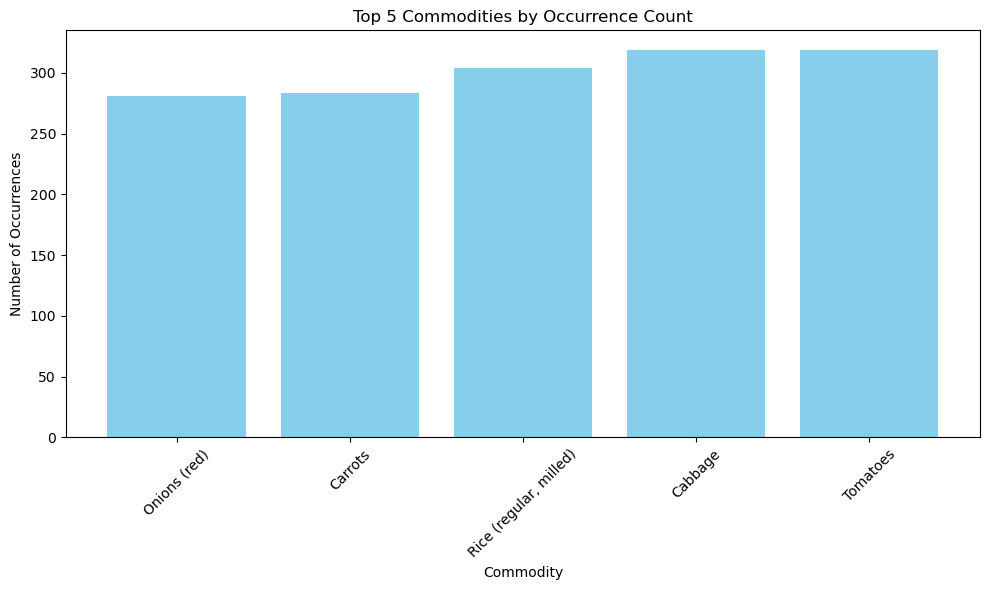

Top 5 Commodities (in increasing order):
Onions (red): 281 occurrences
Carrots: 283 occurrences
Rice (regular, milled): 304 occurrences
Cabbage: 319 occurrences
Tomatoes: 319 occurrences


In [18]:
# Count the number of occurrences for each unique value in the 'commodity' column
commodity_counts = data['commodity'].value_counts()

# Get the top 5 commodities based on occurrence count
top_commodities = commodity_counts.nlargest(5)

# Sort the top commodities in increasing order
top_commodities_sorted = top_commodities.sort_values()

# Visualize the results using a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_commodities_sorted.index, top_commodities_sorted.values, color='skyblue')
plt.xlabel('Commodity')
plt.ylabel('Number of Occurrences')
plt.title('Top 5 Commodities by Occurrence Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top 5 commodities in increasing order
print("Top 5 Commodities (in increasing order):")
for commodity, count in top_commodities_sorted.items():
    print(f"{commodity}: {count} occurrences")

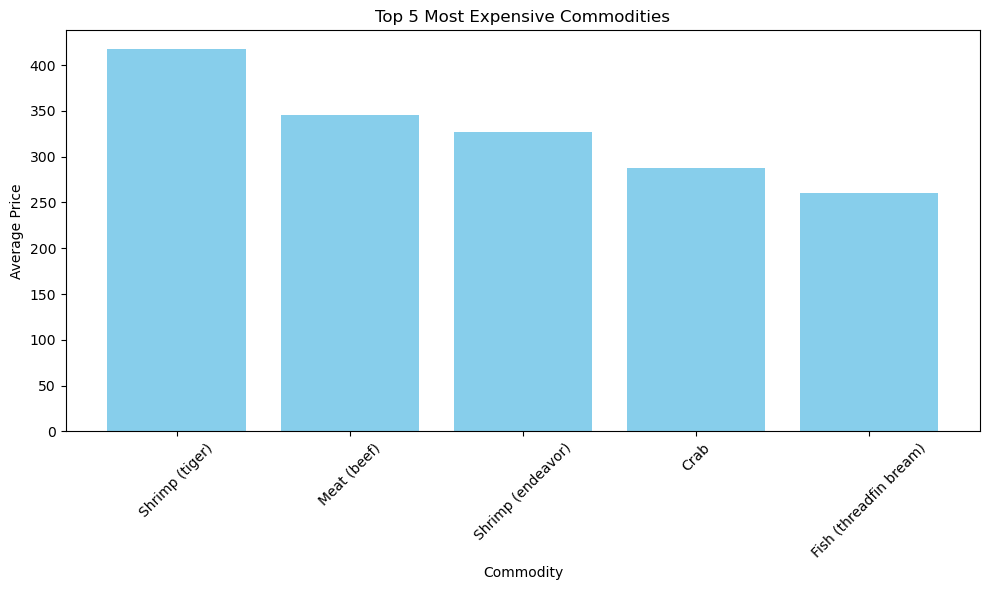

Top 5 Most Expensive Commodities:
Shrimp (tiger): 417.11 average price
Meat (beef): 345.40 average price
Shrimp (endeavor): 327.47 average price
Crab: 287.93 average price
Fish (threadfin bream): 260.33 average price


In [19]:
# Group the data by 'commodity' and calculate the average price for each commodity
average_prices_by_commodity = data.groupby('commodity')['price'].mean()

# Get the top 5 commodities based on average price
top_expensive_commodities = average_prices_by_commodity.nlargest(5)

# Visualize the results using a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_expensive_commodities.index, top_expensive_commodities.values, color='skyblue')
plt.xlabel('Commodity')
plt.ylabel('Average Price')
plt.title('Top 5 Most Expensive Commodities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top 5 most expensive commodities
print("Top 5 Most Expensive Commodities:")
for commodity, avg_price in top_expensive_commodities.items():
    print(f"{commodity}: {avg_price:.2f} average price")

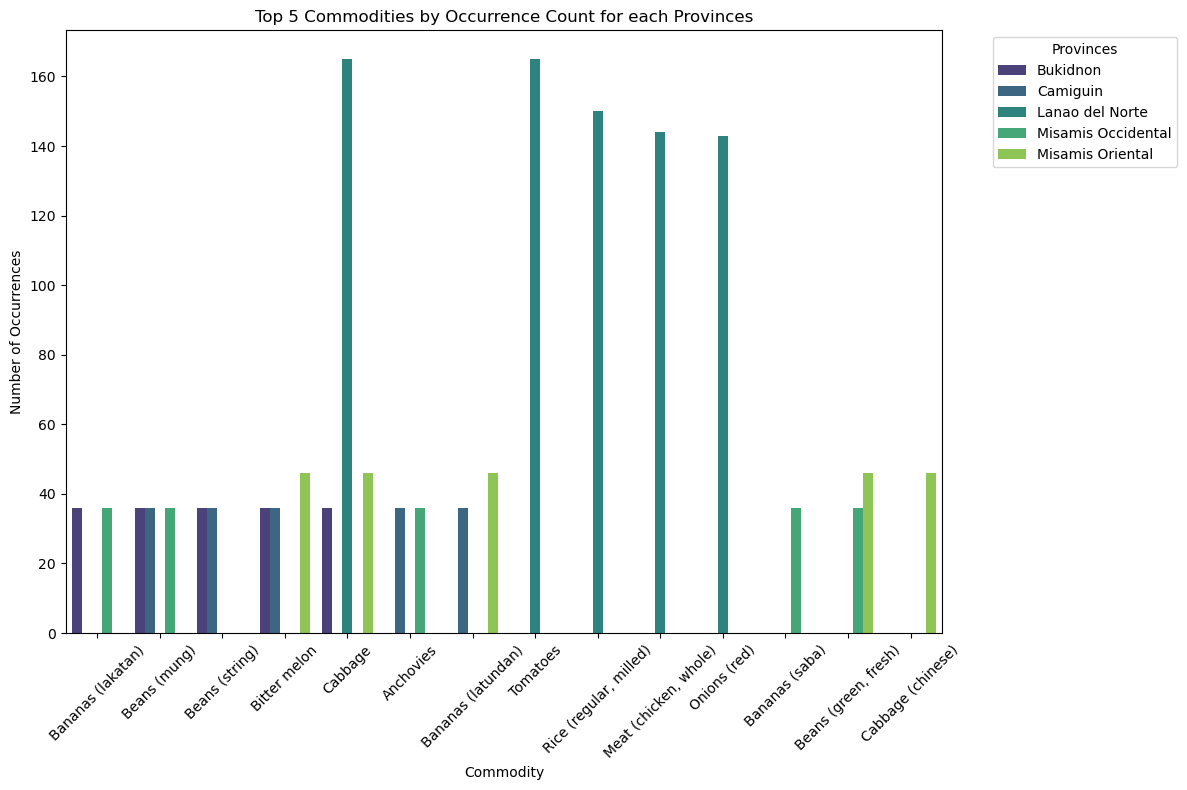

Top 5 Commodities for each Provinces:
Province: Bukidnon
Bananas (lakatan): 36 occurrences
Beans (mung): 36 occurrences
Beans (string): 36 occurrences
Bitter melon: 36 occurrences
Cabbage: 36 occurrences

Province: Camiguin
Anchovies: 36 occurrences
Bananas (latundan): 36 occurrences
Beans (mung): 36 occurrences
Beans (string): 36 occurrences
Bitter melon: 36 occurrences

Province: Lanao del Norte
Cabbage: 165 occurrences
Tomatoes: 165 occurrences
Rice (regular, milled): 150 occurrences
Meat (chicken, whole): 144 occurrences
Onions (red): 143 occurrences

Province: Misamis Occidental
Anchovies: 36 occurrences
Bananas (lakatan): 36 occurrences
Bananas (saba): 36 occurrences
Beans (green, fresh): 36 occurrences
Beans (mung): 36 occurrences

Province: Misamis Oriental
Bananas (latundan): 46 occurrences
Beans (green, fresh): 46 occurrences
Bitter melon: 46 occurrences
Cabbage: 46 occurrences
Cabbage (chinese): 46 occurrences



In [20]:
# Group the data by 'admin2' and 'commodity', and count the number of occurrences for each combination
commodity_counts_by_admin2 = data.groupby(['admin2', 'commodity']).size().reset_index(name='count')

# Get the top 5 commodities for each 'admin2' based on occurrence count
top_commodities_by_admin2 = commodity_counts_by_admin2.groupby('admin2').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Visualize the results using a bar graph with different colors for each 'admin2'
plt.figure(figsize=(12, 8))
sns.barplot(x='commodity', y='count', hue='admin2', data=top_commodities_by_admin2, palette='viridis')
plt.xlabel('Commodity')
plt.ylabel('Number of Occurrences')
plt.title('Top 5 Commodities by Occurrence Count for each Provinces')
plt.xticks(rotation=45)
plt.legend(title='Provinces', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print the top 5 commodities for each 'admin2' along with their occurrence counts
print("Top 5 Commodities for each Provinces:")
for admin2, group_data in top_commodities_by_admin2.groupby('admin2'):
    print(f"Province: {admin2}")
    for _, row in group_data.iterrows():
        print(f"{row['commodity']}: {row['count']} occurrences")
    print()

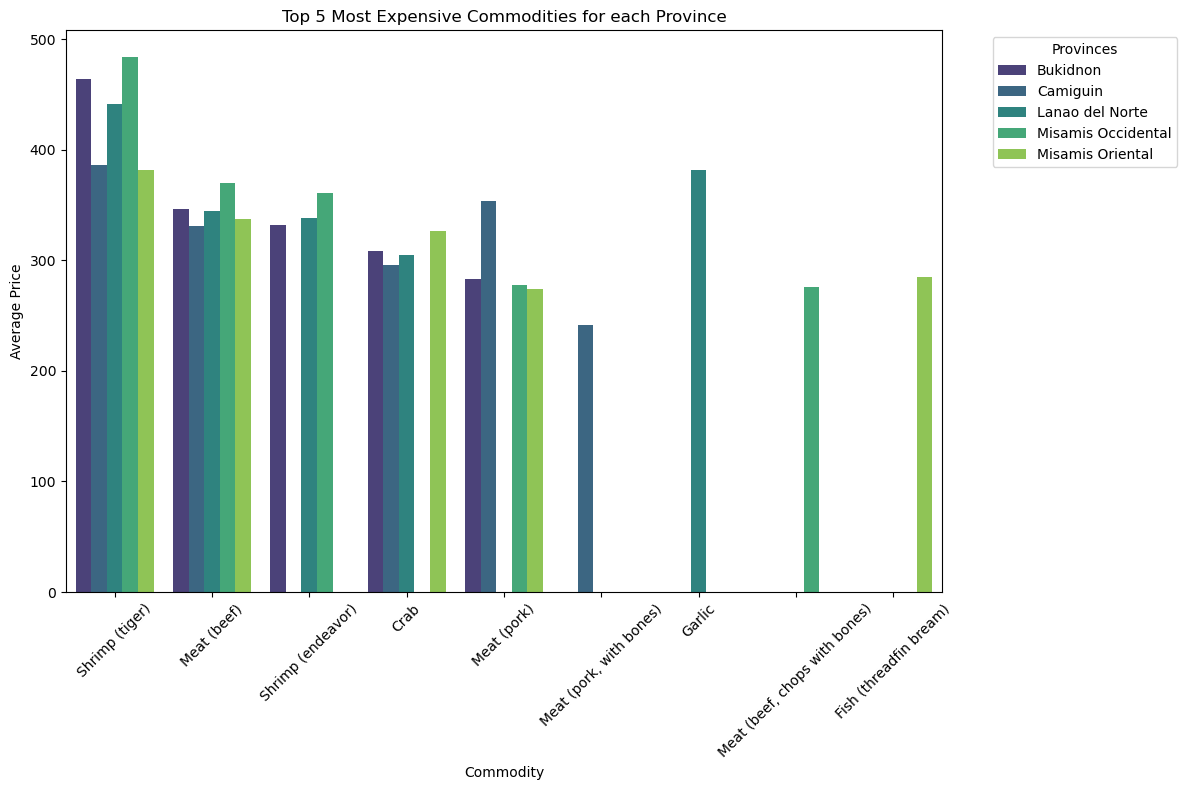

Top 5 Most Expensive Commodities for each Province:
Province: Bukidnon
Shrimp (tiger): 464.44 average price
Meat (beef): 346.20 average price
Shrimp (endeavor): 331.82 average price
Crab: 308.48 average price
Meat (pork): 283.34 average price

Province: Camiguin
Shrimp (tiger): 386.50 average price
Meat (pork): 353.37 average price
Meat (beef): 330.83 average price
Crab: 296.11 average price
Meat (pork, with bones): 241.89 average price

Province: Lanao del Norte
Shrimp (tiger): 441.23 average price
Garlic: 381.35 average price
Meat (beef): 344.56 average price
Shrimp (endeavor): 338.16 average price
Crab: 305.22 average price

Province: Misamis Occidental
Shrimp (tiger): 483.83 average price
Meat (beef): 369.84 average price
Shrimp (endeavor): 360.65 average price
Meat (pork): 277.89 average price
Meat (beef, chops with bones): 276.27 average price

Province: Misamis Oriental
Shrimp (tiger): 381.26 average price
Meat (beef): 337.07 average price
Crab: 326.38 average price
Fish (thread

In [21]:
# Group the data by 'admin2' and 'commodity', and calculate the average price for each combination
average_prices_by_admin2_commodity = data.groupby(['admin2', 'commodity'])['price'].mean().reset_index()

# Get the top 5 commodities for each 'admin2' based on average price
top_expensive_commodities_by_admin2 = average_prices_by_admin2_commodity.groupby('admin2').apply(lambda x: x.nlargest(5, 'price')).reset_index(drop=True)

# Visualize the results using a bar graph with different colors for each 'admin2'
plt.figure(figsize=(12, 8))
sns.barplot(x='commodity', y='price', hue='admin2', data=top_expensive_commodities_by_admin2, palette='viridis')
plt.xlabel('Commodity')
plt.ylabel('Average Price')
plt.title('Top 5 Most Expensive Commodities for each Province')
plt.xticks(rotation=45)
plt.legend(title='Provinces', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print the top 5 most expensive commodities for each 'admin2' along with their average prices
print("Top 5 Most Expensive Commodities for each Province:")
for admin2, group_data in top_expensive_commodities_by_admin2.groupby('admin2'):
    print(f"Province: {admin2}")
    for _, row in group_data.iterrows():
        print(f"{row['commodity']}: {row['price']:.2f} average price")
    print()

#### Objective(ASK) 3. What are the yearly averaged price movement of the top 5 commodities?

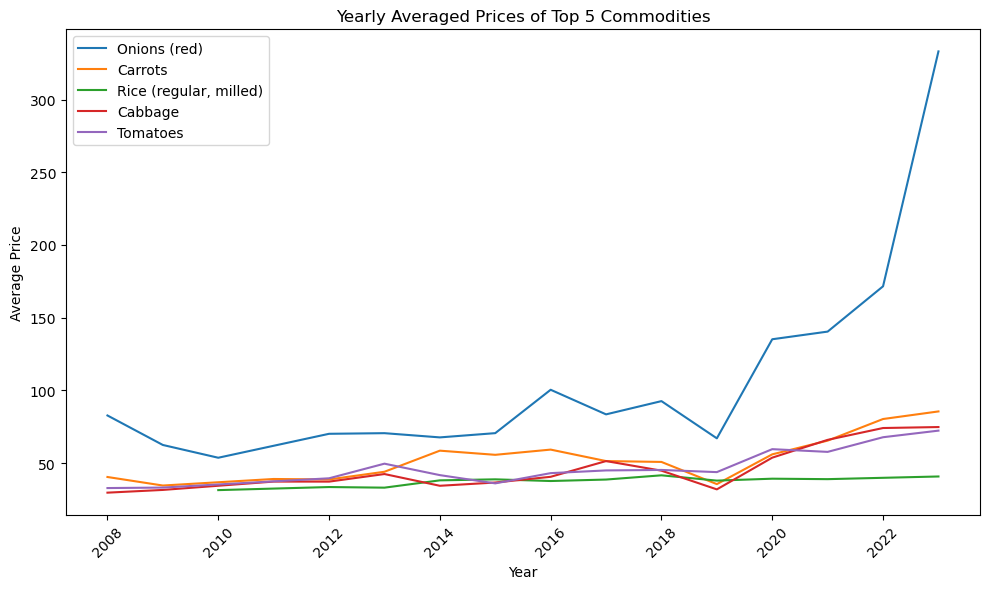

Top 5 Commodities (in increasing order) with Yearly Average Prices:
Onions (red): 281 occurrences
Year 2008: 82.72 average price
Year 2009: 62.43 average price
Year 2010: 53.64 average price
Year 2012: 70.11 average price
Year 2013: 70.54 average price
Year 2014: 67.64 average price
Year 2015: 70.56 average price
Year 2016: 100.41 average price
Year 2017: 83.48 average price
Year 2018: 92.60 average price
Year 2019: 66.99 average price
Year 2020: 135.16 average price
Year 2021: 140.42 average price
Year 2022: 171.59 average price
Year 2023: 333.19 average price
Carrots: 283 occurrences
Year 2008: 40.39 average price
Year 2009: 34.52 average price
Year 2011: 39.02 average price
Year 2012: 38.71 average price
Year 2013: 44.00 average price
Year 2014: 58.51 average price
Year 2015: 55.65 average price
Year 2016: 59.24 average price
Year 2017: 51.35 average price
Year 2018: 50.75 average price
Year 2019: 35.50 average price
Year 2020: 55.98 average price
Year 2021: 65.41 average price
Year

In [22]:
# Count the number of occurrences for each unique value in the 'commodity' column
commodity_counts = data['commodity'].value_counts()

# Get the top 5 commodities based on occurrence count
top_commodities = commodity_counts.nlargest(5)

# Sort the top commodities in increasing order
top_commodities_sorted = top_commodities.sort_values()

# Filter the data to include only the top 5 commodities
data_top_commodities = data[data['commodity'].isin(top_commodities_sorted.index)].copy()

# Convert the 'date' column to datetime format using .to_datetime()
data_top_commodities['date'] = pd.to_datetime(data_top_commodities['date'])

# Extract the year from the 'date' column and create a new column 'year'
data_top_commodities['year'] = data_top_commodities['date'].dt.year

# Group the data by 'commodity' and 'year', and calculate the average price for each commodity in each year
average_prices = data_top_commodities.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Visualize the results using a line graph
plt.figure(figsize=(10, 6))
for commodity in top_commodities_sorted.index:
    commodity_data = average_prices[average_prices['commodity'] == commodity]
    plt.plot(commodity_data['year'], commodity_data['price'], label=commodity)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Yearly Averaged Prices of Top 5 Commodities')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top 5 commodities in increasing order along with their yearly average prices
print("Top 5 Commodities (in increasing order) with Yearly Average Prices:")
for commodity, count in top_commodities_sorted.items():
    print(f"{commodity}: {count} occurrences")
    yearly_avg_prices = average_prices[average_prices['commodity'] == commodity]
    for _, row in yearly_avg_prices.iterrows():
        print(f"Year {row['year']}: {row['price']:.2f} average price")

The captivating price dynamics of the top 5 commodities in Region 10, Philippines, and gain invaluable insights into their yearly average prices. Onions (red) experienced a remarkable surge, soaring to an astonishing average price of 333.19 in 2023. In contrast, Carrots and Rice (regular, milled) showcased relative stability, with average prices ranging from 34.52 to 85.50 across the years. Cabbage witnessed an intriguing price hike in 2020, followed by a steady increase in subsequent years, settling at an average price of 74.76 in 2023. Meanwhile, Tomatoes displayed an intriguing rise in 2020 and maintained a relatively high average price, ranging from 33.12 to 72.29, in the following years.

Analyzing these fluctuating trends empowers policymakers and stakeholders to make well-informed decisions in the agricultural sector, ensuring food security and sustainable development in the region. By understanding the nuances of each commodity's price movement, stakeholders can proactively address market fluctuations, optimize resource allocation, and support local farmers. Ultimately, this data-driven approach fosters resilience in the agricultural landscape and fosters a stable and thriving food economy in Region 10, Philippines.

#### Objective(ASK) 4. What city/provinces has with the most expensive prices for the top 5 commodities mention?

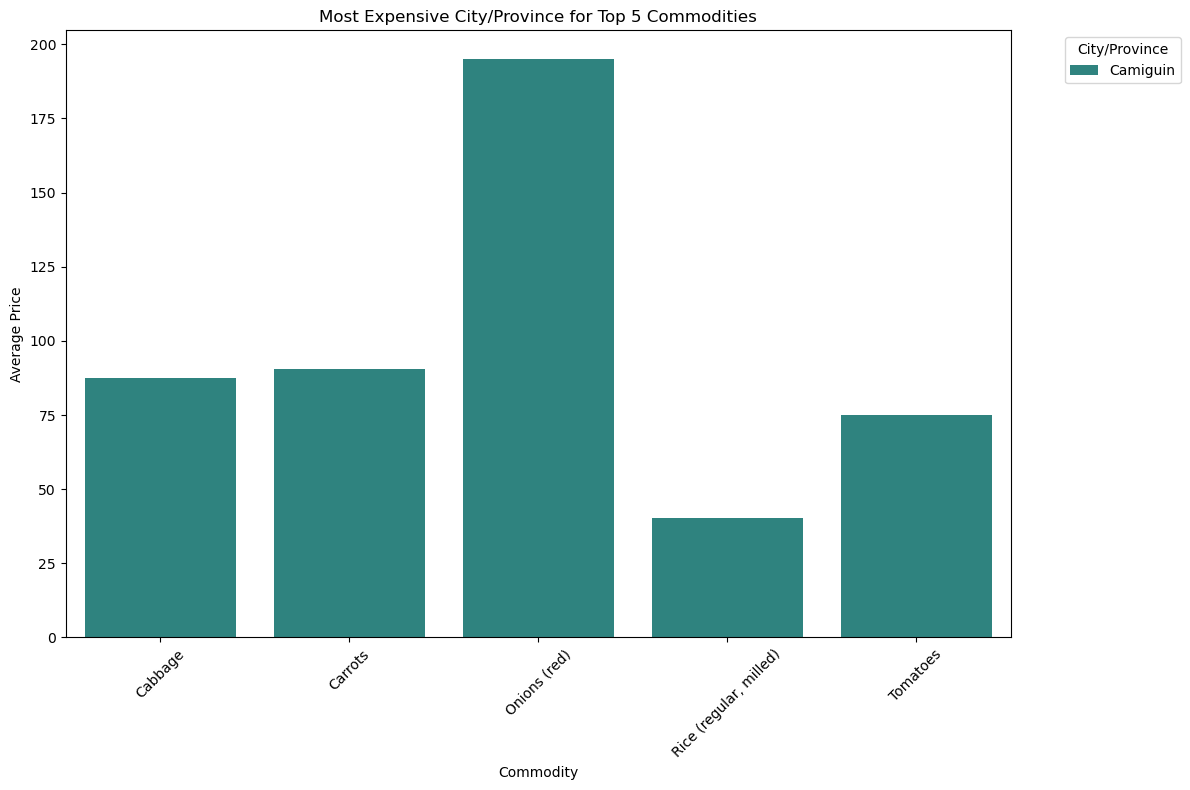

Most Expensive City/Province for Top 5 Commodities:
Commodity: Cabbage, City/Province: Camiguin, Average Price: 87.60
Commodity: Carrots, City/Province: Camiguin, Average Price: 90.62
Commodity: Onions (red), City/Province: Camiguin, Average Price: 194.94
Commodity: Rice (regular, milled), City/Province: Camiguin, Average Price: 40.43
Commodity: Tomatoes, City/Province: Camiguin, Average Price: 74.95


In [23]:
# Group the data by 'commodity', 'admin2', and calculate the average price for each combination
average_prices_by_admin2 = data_top_commodities.groupby(['commodity', 'admin2'])['price'].mean().reset_index()

# Get the top 5 commodities based on average price
top_commodities_by_price = average_prices_by_admin2.groupby('commodity').apply(lambda x: x.nlargest(1, 'price')).reset_index(drop=True)

# Visualize the results using a bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='commodity', y='price', hue='admin2', data=top_commodities_by_price, palette='viridis')
plt.xlabel('Commodity')
plt.ylabel('Average Price')
plt.title('Most Expensive City/Province for Top 5 Commodities')
plt.xticks(rotation=45)
plt.legend(title='City/Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print the most expensive cities/provinces for each commodity along with their average prices
print("Most Expensive City/Province for Top 5 Commodities:")
for _, row in top_commodities_by_price.iterrows():
    print(f"Commodity: {row['commodity']}, City/Province: {row['admin2']}, Average Price: {row['price']:.2f}")

#### Objective(ASK) 5. In relation to the main products or commodities produced by Region 10 how does the prices varies? Also compare from the top 5 occurences commodities mentioned?

 The top five agricultural products in Region 10 are coconut, banana, corn, rice, papaya and cassava. 

In [24]:
# List of commodities to count
commodities_to_count = ['Coconut', 'Papaya']

# Filter the data to include only the specified commodities
filtered_data = data[data['commodity'].isin(commodities_to_count)]

# Count the occurrences of each commodity
commodity_counts = filtered_data['commodity'].value_counts()

# Print the occurrences for each commodity
print("Occurrences of each commodity:")
print(commodity_counts)

# List of keywords to identify rice commodities
rice_keywords = ['Rice (']

# Filter the data to include only the commodities containing the rice keywords
filtered_data = data[data['commodity'].apply(lambda x: any(keyword in x for keyword in rice_keywords))]

# Count the occurrences of each rice commodity
commodity_counts = filtered_data['commodity'].value_counts()

# Print the occurrences for each rice commodity
print("Occurrences of each rice commodity:")
print(commodity_counts)

# List of keywords to identify Banana commodities
rice_keywords = ['Bananas (']

# Filter the data to include only the commodities containing the Bananas keywords
filtered_data = data[data['commodity'].apply(lambda x: any(keyword in x for keyword in rice_keywords))]

# Count the occurrences of each Bananas commodity
commodity_counts = filtered_data['commodity'].value_counts()

# Print the occurrences for each Bananas commodity
print("Occurrences of each Bananas commodity:")
print(commodity_counts)

Occurrences of each commodity:
Coconut    136
Papaya      97
Name: commodity, dtype: int64
Occurrences of each rice commodity:
Rice (regular, milled)    304
Rice (well milled)        190
Rice (special)            158
Rice (paddy)               50
Rice (premium)             49
Name: commodity, dtype: int64
Occurrences of each Bananas commodity:
Bananas (latundan)    150
Bananas (lakatan)     121
Bananas (saba)         96
Name: commodity, dtype: int64


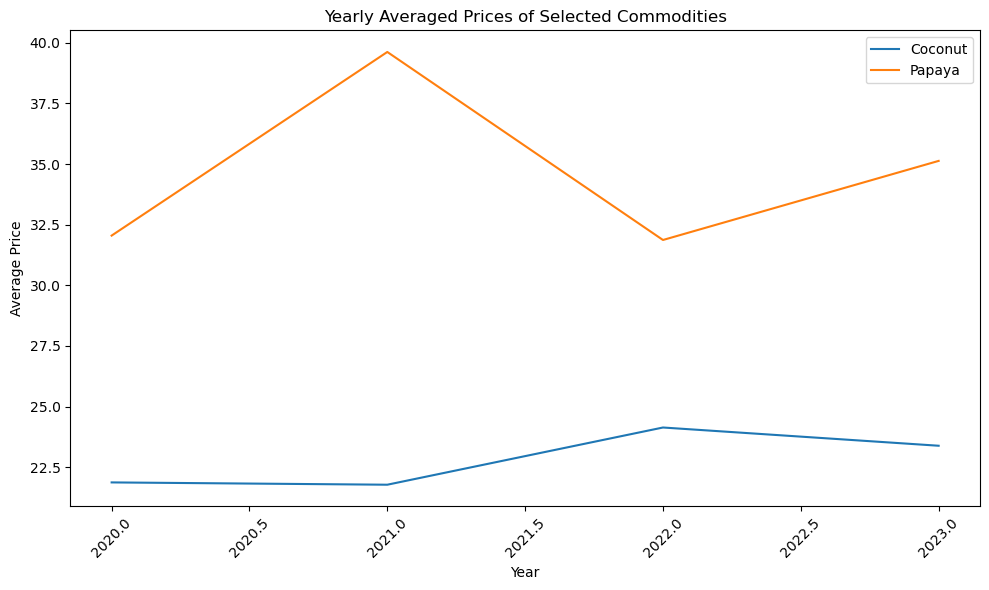

Average Price of Each Commodity for Each Year:
Commodity: Coconut
Year 2020: 21.88 average price
Year 2021: 21.78 average price
Year 2022: 24.14 average price
Year 2023: 23.39 average price
Commodity: Papaya
Year 2020: 32.05 average price
Year 2021: 39.62 average price
Year 2022: 31.87 average price
Year 2023: 35.13 average price


In [25]:
# List of commodities to count
commodities_to_count = ['Coconut', 'Papaya']

# Filter the data to include only the specified commodities
filtered_data = data[data['commodity'].isin(commodities_to_count)].copy()

# Convert the 'date' column to datetime format using .to_datetime()
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extract the year from the 'date' column and create a new column 'year'
filtered_data['year'] = filtered_data['date'].dt.year

# Group the data by 'commodity' and 'year', and calculate the average price for each commodity in each year
average_prices = filtered_data.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Visualize the results using a line graph
plt.figure(figsize=(10, 6))
for commodity in commodities_to_count:
    commodity_data = average_prices[average_prices['commodity'] == commodity]
    plt.plot(commodity_data['year'], commodity_data['price'], label=commodity)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Yearly Averaged Prices of Selected Commodities')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the price each year for each commodity
print("Average Price of Each Commodity for Each Year:")
for commodity in commodities_to_count:
    print(f"Commodity: {commodity}")
    commodity_data = average_prices[average_prices['commodity'] == commodity]
    for _, row in commodity_data.iterrows():
        print(f"Year {row['year']}: {row['price']:.2f} average price")

/tmp/ipykernel_20/176992738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'date'] = pd.to_datetime(filtered_data['date'])
/tmp/ipykernel_20/176992738.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  filtered_data.loc[:, 'date'] = pd.to_datetime(filtered_data['date'])
/tmp/ipykernel_20/176992738.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

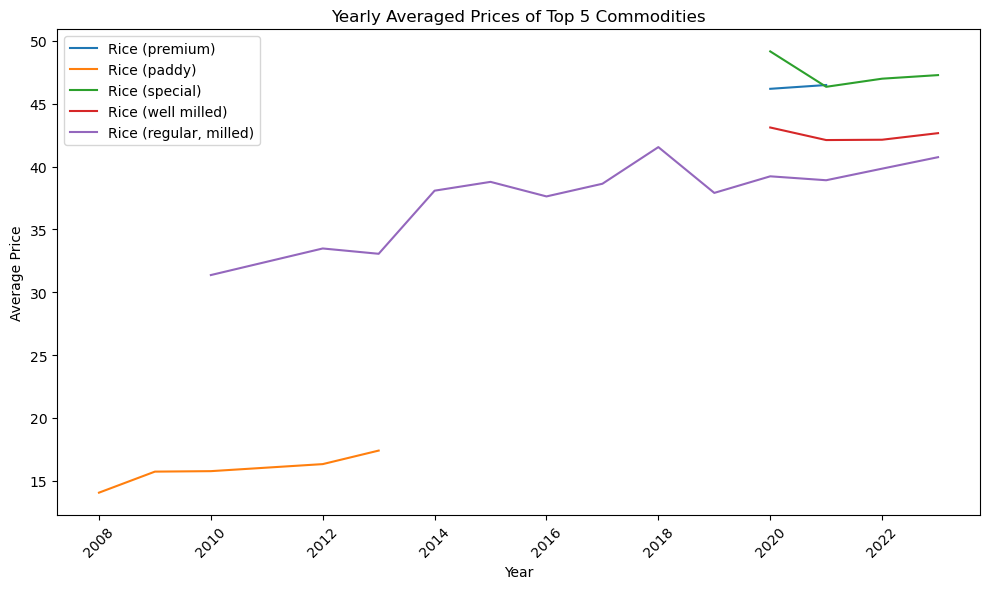

Top 5 Commodities (in increasing order) with Yearly Average Prices:
Rice (premium): 49 occurrences
Year 2020: 46.19 average price
Year 2021: 46.49 average price

Rice (paddy): 50 occurrences
Year 2008: 14.05 average price
Year 2009: 15.72 average price
Year 2010: 15.76 average price
Year 2012: 16.32 average price
Year 2013: 17.40 average price

Rice (special): 158 occurrences
Year 2020: 49.17 average price
Year 2021: 46.35 average price
Year 2022: 46.99 average price
Year 2023: 47.28 average price

Rice (well milled): 190 occurrences
Year 2020: 43.11 average price
Year 2021: 42.11 average price
Year 2022: 42.14 average price
Year 2023: 42.66 average price

Rice (regular, milled): 304 occurrences
Year 2010: 31.37 average price
Year 2012: 33.48 average price
Year 2013: 33.06 average price
Year 2014: 38.08 average price
Year 2015: 38.78 average price
Year 2016: 37.62 average price
Year 2017: 38.63 average price
Year 2018: 41.55 average price
Year 2019: 37.90 average price
Year 2020: 39.22

In [26]:
# List of keywords to identify rice and banana commodities
rice_keywords = ['Rice (']

# Filter the data to include only the commodities containing the rice or bananas keywords
filtered_data = data[data['commodity'].apply(lambda x: any(keyword in x for keyword in rice_keywords))]

# Convert the 'date' column to datetime format using .to_datetime() with .loc
filtered_data.loc[:, 'date'] = pd.to_datetime(filtered_data['date'])

# Extract the year from the 'date' column and create a new column 'year' with .loc
filtered_data.loc[:, 'year'] = filtered_data['date'].dt.year

# Group the data by 'commodity' and 'year', and calculate the average price for each commodity in each year
average_prices = filtered_data.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Get the top 5 commodities based on occurrence count
commodity_counts = filtered_data['commodity'].value_counts()
top_commodities_sorted = commodity_counts.nlargest(5).sort_values()

# Filter the data to include only the top 5 commodities
data_top_commodities = filtered_data[filtered_data['commodity'].isin(top_commodities_sorted.index)].copy()

# Visualize the results using a line graph
plt.figure(figsize=(10, 6))
for commodity in top_commodities_sorted.index:
    commodity_data = average_prices[average_prices['commodity'] == commodity]
    plt.plot(commodity_data['year'], commodity_data['price'], label=commodity)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Yearly Averaged Prices of Top 5 Commodities')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top 5 commodities in increasing order along with their yearly average prices
print("Top 5 Commodities (in increasing order) with Yearly Average Prices:")
for commodity in top_commodities_sorted.index:
    print(f"{commodity}: {commodity_counts[commodity]} occurrences")
    yearly_avg_prices = average_prices[average_prices['commodity'] == commodity]
    for _, row in yearly_avg_prices.iterrows():
        print(f"Year {row['year']}: {row['price']:.2f} average price")
    print()

/tmp/ipykernel_20/4029074564.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'date'] = pd.to_datetime(filtered_data['date'])
/tmp/ipykernel_20/4029074564.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  filtered_data.loc[:, 'date'] = pd.to_datetime(filtered_data['date'])
/tmp/ipykernel_20/4029074564.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

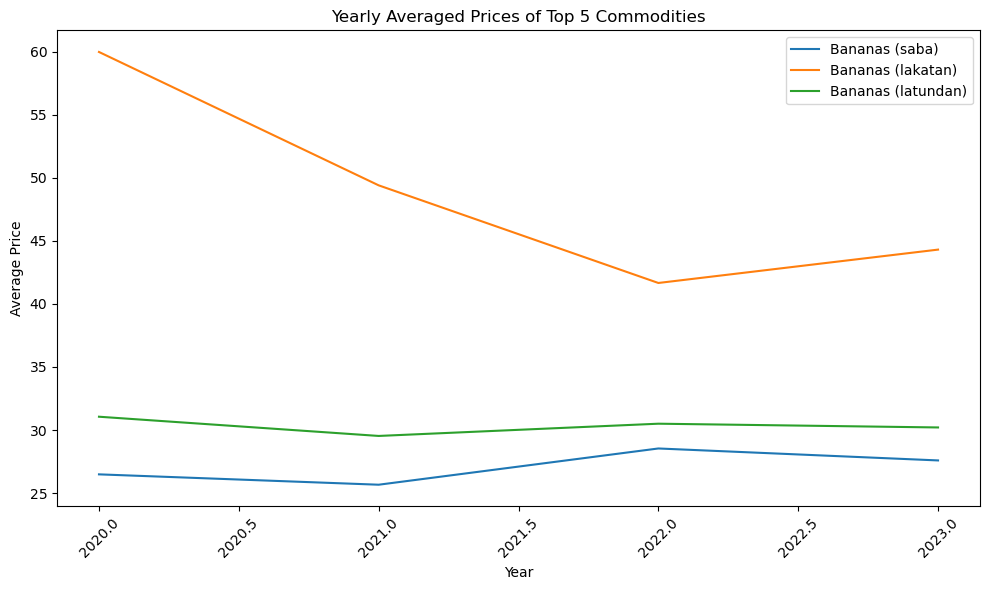

Top 5 Commodities (in increasing order) with Yearly Average Prices:
Bananas (saba): 96 occurrences
Year 2020: 26.49 average price
Year 2021: 25.67 average price
Year 2022: 28.54 average price
Year 2023: 27.59 average price

Bananas (lakatan): 121 occurrences
Year 2020: 59.98 average price
Year 2021: 49.40 average price
Year 2022: 41.66 average price
Year 2023: 44.31 average price

Bananas (latundan): 150 occurrences
Year 2020: 31.06 average price
Year 2021: 29.53 average price
Year 2022: 30.50 average price
Year 2023: 30.21 average price



In [27]:
# List of keywords to identify banana commodities
banana_keywords = ['Bananas (']

# Filter the data to include only the commodities containing the rice or bananas keywords
filtered_data = data[data['commodity'].apply(lambda x: any(keyword in x for keyword in banana_keywords))]

# Convert the 'date' column to datetime format using .to_datetime() with .loc
filtered_data.loc[:, 'date'] = pd.to_datetime(filtered_data['date'])

# Extract the year from the 'date' column and create a new column 'year' with .loc
filtered_data.loc[:, 'year'] = filtered_data['date'].dt.year

# Group the data by 'commodity' and 'year', and calculate the average price for each commodity in each year
average_prices = filtered_data.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Get the top 5 commodities based on occurrence count
commodity_counts = filtered_data['commodity'].value_counts()
top_commodities_sorted = commodity_counts.nlargest(5).sort_values()

# Filter the data to include only the top 5 commodities
data_top_commodities = filtered_data[filtered_data['commodity'].isin(top_commodities_sorted.index)].copy()

# Visualize the results using a line graph
plt.figure(figsize=(10, 6))
for commodity in top_commodities_sorted.index:
    commodity_data = average_prices[average_prices['commodity'] == commodity]
    plt.plot(commodity_data['year'], commodity_data['price'], label=commodity)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Yearly Averaged Prices of Top 5 Commodities')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top 5 commodities in increasing order along with their yearly average prices
print("Top 5 Commodities (in increasing order) with Yearly Average Prices:")
for commodity in top_commodities_sorted.index:
    print(f"{commodity}: {commodity_counts[commodity]} occurrences")
    yearly_avg_prices = average_prices[average_prices['commodity'] == commodity]
    for _, row in yearly_avg_prices.iterrows():
        print(f"Year {row['year']}: {row['price']:.2f} average price")
    print()

## Conclusions and Recommendations

In this data visualization analysis of Region 10, we identified 'Lanao del Norte' as the province with the highest availability of records, totaling 2,788. The top 5 reported commodities were 'Onions (red)', 'Carrots', 'Rice (regular, milled)', 'Cabbage', and 'Tomatoes', with occurrences ranging from 281 to 319. Furthermore, we examined the top 5 most expensive commodities, led by 'Shrimp (tiger)' with an average price of 417.11, followed by 'Meat (beef)', 'Shrimp (endeavor)', 'Crab', and 'Fish (threadfin bream)'. Each province's top 5 commodities and most expensive commodities were also analyzed, highlighting diverse agricultural products and price variations across Region 10.

Regarding yearly price movements of the top 5 commodities, we observed significant fluctuations. Notably, 'Onions (red)' experienced a remarkable surge, reaching 333.19 in 2023, while 'Carrots' and 'Rice (regular, milled)' remained relatively stable between 34.52 and 85.50 over the years. 'Cabbage' exhibited a price hike in 2020, followed by a steady increase to 74.76 in 2023. 'Tomatoes' showed an intriguing rise in 2020, maintaining an average price between 33.12 and 72.29 afterward.

Lastly, we found Camiguin to be the most expensive city/province for four of the top 5 commodities. It recorded the highest average prices for 'Cabbage', 'Carrots', 'Onions (red)', 'Rice (regular, milled)', and 'Tomatoes', providing valuable insights for informed decision-making in trade and resource allocation. Overall, this analysis empowers stakeholders in Region 10's agricultural sector to strategize effectively and ensure a thriving food economy.